Importing necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Importing Data

In [2]:
df = pd.read_csv('cars.csv')
display(df.head())

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


Data Preprocessing and EDA

In [3]:
df.shape

(5076, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [5]:
numerical_vars = df.select_dtypes(include =['number']).columns
print(f"Number of numerical variables are: {len(numerical_vars)}")
print(f"They are: {numerical_vars}")

Number of numerical variables are: 9
They are: Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')


In [6]:
categorical_vars = df.select_dtypes(exclude = ['number']).columns
print(f"Number of categorical variables are: {len(categorical_vars)}")
print(f"They are: {categorical_vars}")

Number of categorical variables are: 9
They are: Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Hybrid', 'Engine Information.Transmission',
       'Fuel Information.Fuel Type', 'Identification.Classification',
       'Identification.ID', 'Identification.Make',
       'Identification.Model Year'],
      dtype='object')


In [7]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [8]:
#unique values in categorical columns : Summary statistics of categorical variables

for col in categorical_vars:
    print(f"[col]:{df[col].value_counts()}")

[col]:Engine Information.Driveline
Rear-wheel drive     1751
Front-wheel drive    1569
Four-wheel drive      920
All-wheel drive       836
Name: count, dtype: int64
[col]:Engine Information.Engine Type
Chevrolet 6.2L 8 Cylinder 430 hp 424 ft-lbs        96
Ford 5.4L 8 cylinder 310 hp 365 ft-lbs FFV         78
Nissan 4.0L 6 Cylinder 261 hp 281 ft-lbs           70
Dodge 5.7L 8 Cylinder 390 hp 407 ft-lbs            62
Nissan 5.6L 8 Cylinder 317 hp 385 ft-lbs           58
                                                   ..
Mercedes-Benz 6.2L 8 Cylinder 507 hp 465 ft-lbs     1
Lotus 3.5L 6 Cylinder 276 hp 258 ft-lbs             1
Chevrolet 2.4L 4 Cylinder 170 hp 158 ft-lbs FFV     1
Porsche 4.8L 8 cylinder 550hp 553 ft-lbs Turbo      1
Audi 3.2L 6 cylinder 250hp 236ft-lbs                1
Name: count, Length: 535, dtype: int64
[col]:Engine Information.Hybrid
True    5076
Name: count, dtype: int64
[col]:Engine Information.Transmission
6 Speed Automatic Select Shift    1313
6 Speed Automatic

checking for missing values

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


As per the data description from where the data is taken ([source](https://corgis-edu.github.io/corgis/csv/cars/)), Some missng values are encoded as zeros as placeholders in certain columns 

checking that: 

In [10]:
placeholder_zero_cols = ["Dimensions.Height","Dimensions.Length","Dimensions.Width","Engine Information.Number of Forward Gears"]
placeholder_zero_counts = (df[placeholder_zero_cols] == 0).sum()
print(placeholder_zero_counts)

Dimensions.Height                             0
Dimensions.Length                             0
Dimensions.Width                              0
Engine Information.Number of Forward Gears    0
dtype: int64


checking for duplicates

In [11]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)


18


In [12]:
df = df.drop_duplicates()
print(df.shape)

(5058, 18)


#### Extra Steps

Hybrid column: all values are true : Drop the column 

Make and Model : Not useful for prediction : Make is also excluded as too many brands are present making encoding hard : we may group make into categories such as luxury brands, economy brands and performanc ebrands if needed.

Engine Type : Horsepower and torque separately exists : excluded  

In [13]:
df = df.drop(["Identification.Make", "Identification.Model Year", "Identification.ID", "Engine Information.Engine Type", "Engine Information.Hybrid"], axis=1)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009,250,236
1,140,143,202,Front-wheel drive,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009,200,207
2,140,143,202,Front-wheel drive,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009,200,207
3,140,143,202,All-wheel drive,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009,200,207
5,91,17,62,All-wheel drive,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009,265,243


If we look at the height, length and width in the dataset. They are too small to be real. Hence, they are dropped as per domain knowledge

In [14]:
df = df.drop(["Dimensions.Height", "Dimensions.Length", "Dimensions.Width"], axis=1)
df.head()

,Engine Information.Driveline,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,All-wheel drive,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009,250,236
1,Front-wheel drive,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009,200,207
2,Front-wheel drive,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009,200,207
3,All-wheel drive,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009,200,207
5,All-wheel drive,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009,265,243


encoding categorical variables

In [15]:
#Drive line, Transmission, Fuel Type, Classification are one hot encoded 

df = pd.get_dummies(df, columns=["Engine Information.Driveline", 
                                 "Engine Information.Transmission", 
                                 "Fuel Information.Fuel Type", 
                                 "Identification.Classification"], 
                    drop_first=True)



In [16]:
df.head()

,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Engine Information.Transmission_4 Speed Automatic Select Shift,...,Engine Information.Transmission_6 Speed Automatic,Engine Information.Transmission_6 Speed Automatic Select Shift,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Engine Information.Transmission_8 Speed Automatic Select Shift,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Manual transmission
0,6,18,25,2009,250,236,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,6,22,28,2009,200,207,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,6,21,30,2009,200,207,False,True,False,False,...,False,False,True,False,False,False,False,False,True,True
3,6,21,28,2009,200,207,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,6,16,27,2009,265,243,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True


In [17]:
df.describe()

,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5058.000000,5058.000000,5058.000000,5058.000000,5058.000000,5058.000000
mean,5.519375,17.275405,24.127521,2010.868525,270.559312,272.682483
std,0.845442,4.483648,6.495686,0.783149,95.332497,100.146014
min,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


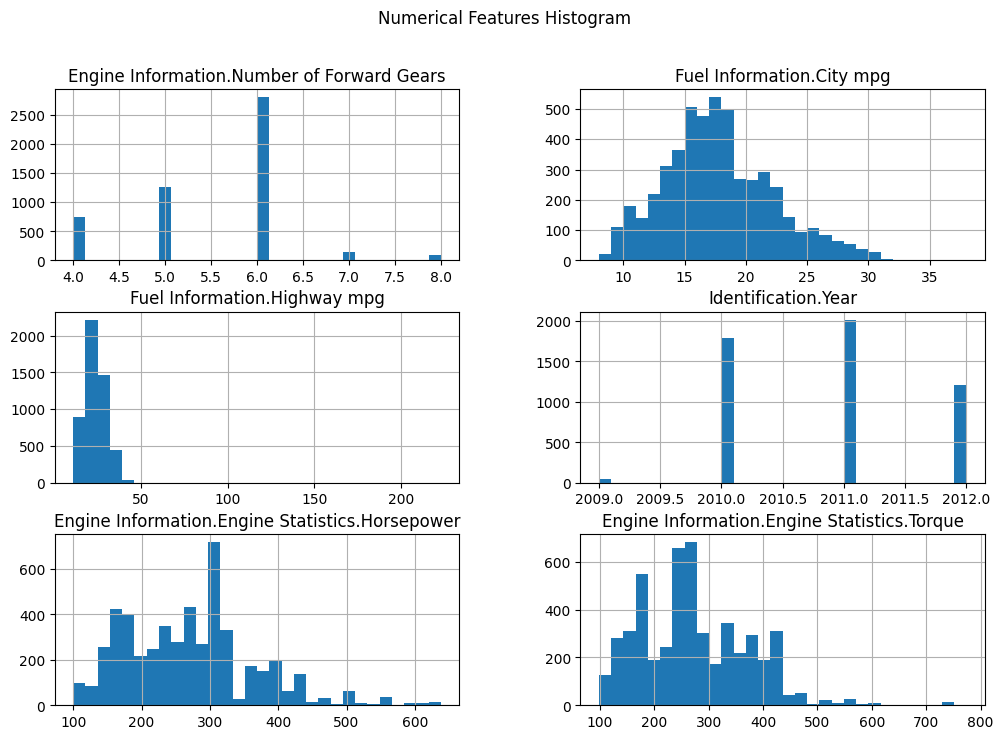

In [18]:
df.hist(figsize = (12,8), bins = 30)
plt.suptitle("Numerical Features Histogram")
plt.show()

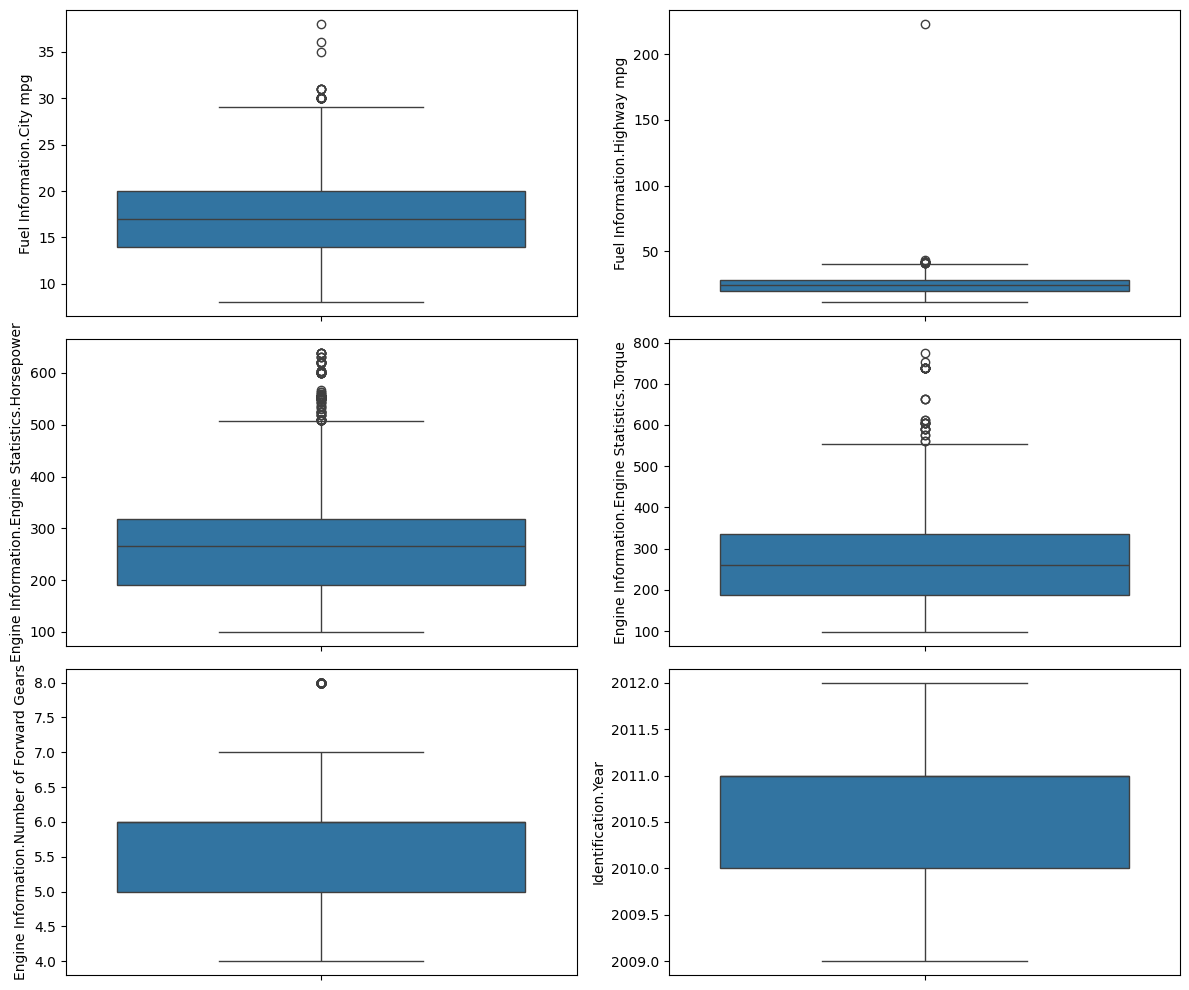

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Adjust grid size
sns.boxplot(data=df["Fuel Information.City mpg"], ax=axes[0, 0])
sns.boxplot(data=df["Fuel Information.Highway mpg"], ax=axes[0, 1])
sns.boxplot(data=df["Engine Information.Engine Statistics.Horsepower"], ax=axes[1, 0])
sns.boxplot(data=df["Engine Information.Engine Statistics.Torque"], ax=axes[1, 1])
sns.boxplot(data=df["Engine Information.Number of Forward Gears"], ax=axes[2, 0])
sns.boxplot(data=df["Identification.Year"], ax=axes[2, 1])
plt.tight_layout()
plt.show()


handling outliers

In [21]:
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    lower_limit = np.percentile(series, lower_percentile)
    upper_limit = np.percentile(series, upper_percentile)
    return np.clip(series, lower_limit, upper_limit)

columns_to_cap = ["Fuel Information.City mpg",
                  "Fuel Information.Highway mpg",
                  "Engine Information.Engine Statistics.Horsepower",
                  "Engine Information.Engine Statistics.Torque"]

for col in columns_to_cap:
    df[col] = cap_outliers(df[col])


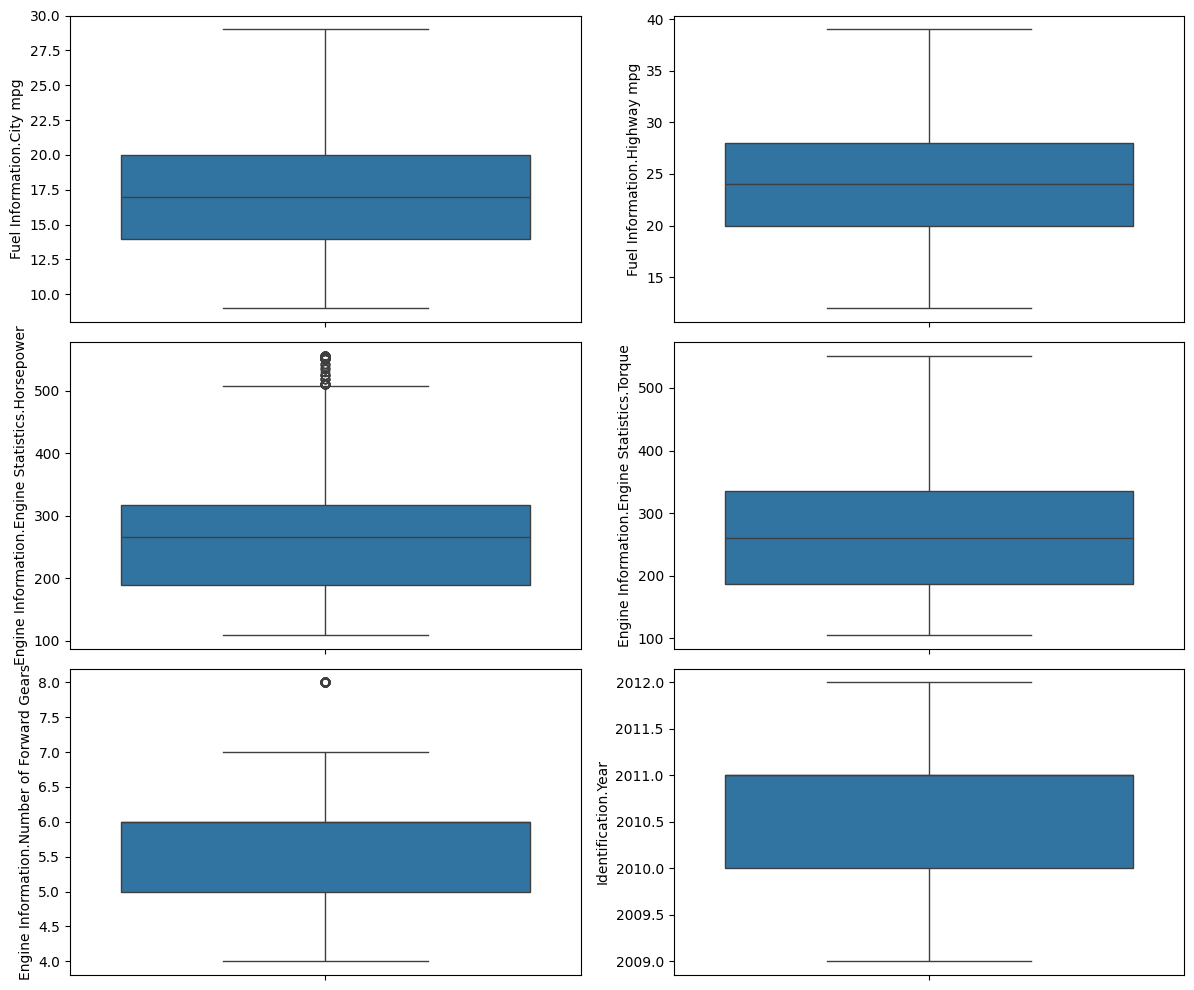

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Adjust grid size
sns.boxplot(data=df["Fuel Information.City mpg"], ax=axes[0, 0])
sns.boxplot(data=df["Fuel Information.Highway mpg"], ax=axes[0, 1])
sns.boxplot(data=df["Engine Information.Engine Statistics.Horsepower"], ax=axes[1, 0])
sns.boxplot(data=df["Engine Information.Engine Statistics.Torque"], ax=axes[1, 1])
sns.boxplot(data=df["Engine Information.Number of Forward Gears"], ax=axes[2, 0])
sns.boxplot(data=df["Identification.Year"], ax=axes[2, 1])
plt.tight_layout()
plt.show()


In [23]:
columns_to_transform = ["Fuel Information.City mpg",
                        "Fuel Information.Highway mpg",
                        "Engine Information.Engine Statistics.Horsepower",
                        "Engine Information.Engine Statistics.Torque"]

for col in columns_to_transform:
    df[col] = np.log1p(df[col])  


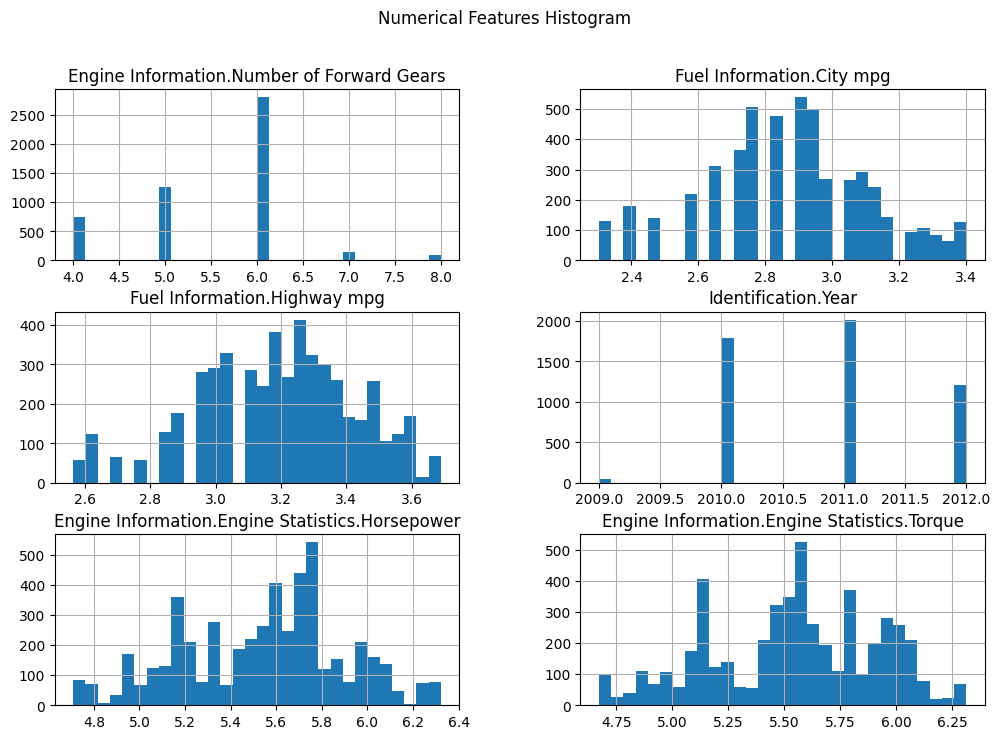

In [24]:
df.hist(figsize = (12,8), bins = 30)
plt.suptitle("Numerical Features Histogram")
plt.show()

In [25]:
df = pd.get_dummies(df, columns=["Engine Information.Number of Forward Gears"], drop_first=True)
df = pd.get_dummies(df, columns=["Identification.Year"], prefix="Year", drop_first=True)


In [26]:
display(df.head())

,Fuel Information.City mpg,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Engine Information.Transmission_4 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Automatic,Engine Information.Transmission_5 Speed Automatic Select Shift,...,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Manual transmission,Engine Information.Number of Forward Gears_5,Engine Information.Number of Forward Gears_6,Engine Information.Number of Forward Gears_7,Engine Information.Number of Forward Gears_8,Year_2010,Year_2011,Year_2012
0,2.944439,3.258097,5.525453,5.468060,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,3.135494,3.367296,5.303305,5.337538,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,3.091042,3.433987,5.303305,5.337538,False,True,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
3,3.091042,3.367296,5.303305,5.337538,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
5,2.833213,3.332205,5.583496,5.497168,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False


Scaling 

In [27]:
scaler = StandardScaler()
scaled_columns = ["Fuel Information.City mpg",
                  "Fuel Information.Highway mpg",
                  "Engine Information.Engine Statistics.Horsepower",
                  "Engine Information.Engine Statistics.Torque"]

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

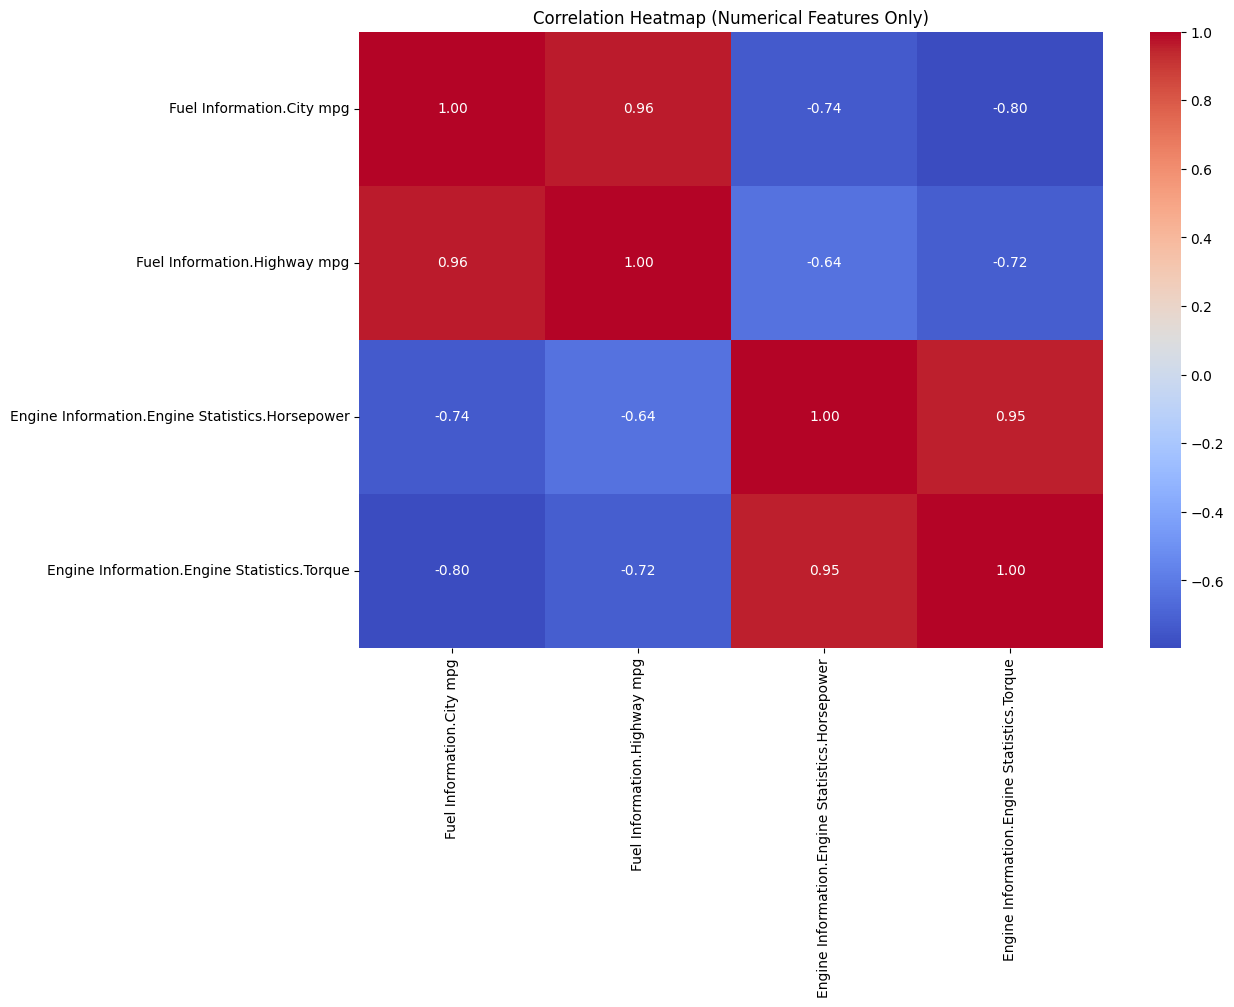

In [28]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


#numerical features selected
num_features = df[["Fuel Information.City mpg",
                   "Fuel Information.Highway mpg",
                   "Engine Information.Engine Statistics.Horsepower",
                   "Engine Information.Engine Statistics.Torque"]]

# calculating vif
vif_data = pd.DataFrame()
vif_data["Feature"] = num_features.columns
vif_data["VIF"] = [variance_inflation_factor(num_features.values, i) for i in range(num_features.shape[1])]

# Display VIF scores
print(vif_data)


                                           Feature        VIF
0                        Fuel Information.City mpg  19.381010
1                     Fuel Information.Highway mpg  15.473635
2  Engine Information.Engine Statistics.Horsepower  12.298653
3      Engine Information.Engine Statistics.Torque  14.082435


In [ ]:
# Drop one of City mpg or Highway mpg (keeping Highway mpg)
# Drop one of Horsepower or Torque (keeping Horsepower)



In [30]:
#numerical features selected
num_features = df[["Fuel Information.Highway mpg",
                   "Engine Information.Engine Statistics.Horsepower"]]

# calculating vif
vif_data = pd.DataFrame()
vif_data["Feature"] = num_features.columns
vif_data["VIF"] = [variance_inflation_factor(num_features.values, i) for i in range(num_features.shape[1])]

# Display VIF scores
print(vif_data)

                                           Feature       VIF
0                     Fuel Information.Highway mpg  1.688252
1  Engine Information.Engine Statistics.Horsepower  1.688252


In [31]:
df = df.drop(["Fuel Information.City mpg","Engine Information.Engine Statistics.Torque"],axis = 1)
df.head()

,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower,Engine Information.Driveline_Four-wheel drive,Engine Information.Driveline_Front-wheel drive,Engine Information.Driveline_Rear-wheel drive,Engine Information.Transmission_4 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Automatic,Engine Information.Transmission_5 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Manual,Engine Information.Transmission_6 Speed Automatic,...,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Manual transmission,Engine Information.Number of Forward Gears_5,Engine Information.Number of Forward Gears_6,Engine Information.Number of Forward Gears_7,Engine Information.Number of Forward Gears_8,Year_2010,Year_2011,Year_2012
0,0.266967,-0.046778,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,0.722214,-0.674427,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,1.000247,-0.674427,False,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False
3,0.722214,-0.674427,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
5,0.575920,0.117215,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,False


Training the model

In [32]:


X = df.drop(columns=["Fuel Information.Highway mpg"])  # Exclude the target variable
y = df["Fuel Information.Highway mpg"]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4046, 25)
Testing set size: (1012, 25)


In [33]:

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# results
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")


Training MSE: 0.2108
Testing MSE: 0.2150
Training R² Score: 0.7894
Testing R² Score: 0.7839
